In [9]:
import os
import pandas as pd

csv_path = "Tweets.csv"
if os.path.exists(csv_path):
    print("Loaded Tweets.csv from working directory.")
    df = pd.read_csv(csv_path, encoding='latin-1', header=None, low_memory=False)
    if df.shape[1] >= 6:
        df = df[[0, 5]]
        df.columns = ['sentiment', 'text']
    else:
        df = df.rename(columns={df.columns[0]: 'sentiment', df.columns[-1]: 'text'})
    texts = df['text'].astype(str).sample(1000, random_state=42)
else:
    print("Sentiment140.csv not found — using a small example dataset so you can see outputs now.")
    texts = pd.Series([
        "I love this product, it's amazing!",
        "Worst purchase ever. Completely useless.",
        "Happy with the service, will buy again.",
        "I'm so disappointed. Not worth the money.",
        "Fantastic! Exceeded my expectations.",
        "Terrible quality, broke after one use.",
        "Great value and fast delivery.",
        "Bad experience with customer support.",
        "I'm pleased with the features and quality.",
        "Not satisfied — returns are a hassle."
    ])
    texts = pd.concat([texts]*100, ignore_index=True).sample(1000, random_state=42)

print("Number of texts used:", len(texts))
print(texts.head())


Loaded Tweets.csv from working directory.
Number of texts used: 1000
12838    positive
2664     positive
6562      neutral
18704     neutral
4104      neutral
Name: text, dtype: object


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', max_features=2000)
X_vec = vectorizer.fit_transform(texts)
print("TF-IDF shape:", X_vec.shape)


TF-IDF shape: (1000, 3)


In [11]:
from sklearn.cluster import KMeans
import numpy as np

n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_vec)
labels = kmeans.labels_
(unique, counts) = np.unique(labels, return_counts=True)
print("Cluster counts:")
for u, c in zip(unique, counts):
    print(f"  Cluster {u}: {c} samples")


Cluster counts:
  Cluster 0: 403 samples
  Cluster 1: 307 samples
  Cluster 2: 290 samples


In [12]:
import pandas as pd
df_examples = pd.DataFrame({'text': texts, 'cluster': labels})
for cl in sorted(df_examples['cluster'].unique()):
    print(f"\nCluster {cl} examples:")
    for t in df_examples[df_examples['cluster']==cl]['text'].head(5).tolist():
        print(" -", t)



Cluster 0 examples:
 - neutral
 - neutral
 - neutral
 - neutral
 - neutral

Cluster 1 examples:
 - positive
 - positive
 - positive
 - positive
 - positive

Cluster 2 examples:
 - negative
 - negative
 - negative
 - negative
 - negative


PCA result shape: (1000, 2)


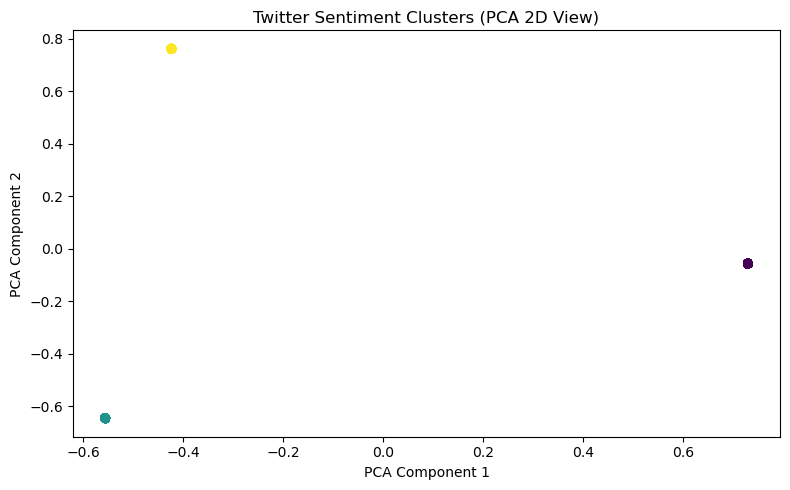

In [13]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X_pca = PCA(n_components=2, random_state=42).fit_transform(X_vec.toarray())
print("PCA result shape:", X_pca.shape)

plt.figure(figsize=(8,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels)
plt.title("Twitter Sentiment Clusters (PCA 2D View)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.tight_layout()
plt.show()


In [14]:
plt.savefig("clusters_pca.png", dpi=150)


<Figure size 640x480 with 0 Axes>